# Lead Scoring Case Study

In [2]:
# For Google Colab we are using following codes to connect the drive where the data is stored

from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Upgrad/Part-2/Lead Scoring Assignment/Leads.csv"

Mounted at /content/drive


## importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

# filter warnings
import warnings
warnings.filterwarnings('ignore')

#Increasing the columns views limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

## Importing the dataset

In [4]:
# read the dataset
df = pd.read_csv(path)

In [5]:
# check the head of the dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [6]:
# check the shape of the dataset
df.shape

(9240, 37)

In [7]:
# check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# check the summary of the dataset
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [9]:
# check the null values
df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [10]:
# check null valeus in percentage
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

Lead Quality                                    51.59
Asymmetrique Activity Index                     45.65
Asymmetrique Profile Score                      45.65
Asymmetrique Activity Score                     45.65
Asymmetrique Profile Index                      45.65
Tags                                            36.29
Lead Profile                                    29.32
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
How did you hear about X Education              23.89
Specialization                                  15.56
City                                            15.37
Page Views Per Visit                             1.48
TotalVisits                                      1.48
Last Activity                                    1.11
Lead Source                                      0.39
Receive More Updates About Our Courses           0.00
I agree to pay the amount th

##### we can see that we have lot of null values in the dataset, so we will drop the columns having more than 40% null values

## Data Cleaning

### Handle the Select values

In [11]:
# find columns with 'Select' values
df[df=='Select'].count().sort_values(ascending=False)

How did you hear about X Education               5043
Lead Profile                                     4146
City                                             2249
Specialization                                   1942
Get updates on DM Content                           0
Through Recommendations                             0
Receive More Updates About Our Courses              0
Tags                                                0
Lead Quality                                        0
Update me on Supply Chain Content                   0
Prospect ID                                         0
Newspaper                                           0
Asymmetrique Activity Index                         0
Asymmetrique Profile Index                          0
Asymmetrique Activity Score                         0
Asymmetrique Profile Score                          0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Digital Advertisement       

In [12]:
# replace 'Select' values with NaN
df = df.replace('Select', np.nan)

In [13]:
# see if 'Select' values are replaced with NaN
df[df=='Select'].count().sort_values(ascending=False)

Prospect ID                                      0
X Education Forums                               0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Tags                                             0
Lead Quality                                     0
Update me on Supply Chain Content                0
Get updates on DM Content                        0
Lead Profile                                     0
City                                             0
Asymmetrique Activity Index                      0
Asymmetrique Profile Index                       0
Asymmetrique Activity Score                      0
Asymmetrique Profile Score                       0
I agree to pay the amount through cheque         0
A free copy of Mastering The Interview           0
Newspaper                                        0
Newspaper Article                                0
Lead Number                    

### handle null values

In [14]:
# check the percentage of null values
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

How did you hear about X Education              78.46
Lead Profile                                    74.19
Lead Quality                                    51.59
Asymmetrique Profile Score                      45.65
Asymmetrique Activity Score                     45.65
Asymmetrique Activity Index                     45.65
Asymmetrique Profile Index                      45.65
City                                            39.71
Specialization                                  36.58
Tags                                            36.29
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
Page Views Per Visit                             1.48
TotalVisits                                      1.48
Last Activity                                    1.11
Lead Source                                      0.39
Receive More Updates About Our Courses           0.00
I agree to pay the amount th

In [15]:
# drop columns with more than 40% null values

# prepare a list of columns to be dropped
cols_to_drop = df.isnull().sum()[df.isnull().sum()>(0.4*len(df))].index
cols_to_drop

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [16]:
# drop the columns
df = df.drop(cols_to_drop, axis=1)

In [17]:
# check the percentage of null values
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

City                                            39.71
Specialization                                  36.58
Tags                                            36.29
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
Page Views Per Visit                             1.48
TotalVisits                                      1.48
Last Activity                                    1.11
Lead Source                                      0.39
Through Recommendations                          0.00
Receive More Updates About Our Courses           0.00
Prospect ID                                      0.00
Newspaper                                        0.00
Update me on Supply Chain Content                0.00
Get updates on DM Content                        0.00
I agree to pay the amount through cheque         0.00
A free copy of Mastering The Interview           0.00
Digital Advertisement       

### Handle Catagorical Columns

In [18]:
# find list of categorical columns
cat_cols = df.select_dtypes(include='object').columns
len(cat_cols)

25

In [19]:
# print value counts of categorical columns with dropna=False
for col in cat_cols:
    print('------------------------------------{}------------------------------------'.format(col))
    print(df[col].value_counts(dropna=False, normalize=True)*100)
    print()

------------------------------------Prospect ID------------------------------------
7927b2df-8bba-4d29-b9a2-b6e0beafe620   0.01
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea   0.01
46befc49-253a-419b-abea-2fd978d2e2b1   0.01
9d35a2c2-09d8-439f-9875-0e8bbf267f5a   0.01
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5   0.01
                                       ... 
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3   0.01
644099a2-3da4-4d23-9546-7676340a372b   0.01
2a093175-415b-4321-9e69-ed8d9df65a3c   0.01
c66249a3-8500-4c66-a511-312d914573de   0.01
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff   0.01
Name: Prospect ID, Length: 9240, dtype: float64

------------------------------------Lead Origin------------------------------------
Landing Page Submission   52.88
API                       38.74
Lead Add Form              7.77
Lead Import                0.60
Quick Add Form             0.01
Name: Lead Origin, dtype: float64

------------------------------------Lead Source------------------------------------
Google              

#### Observations ####
- we can impute missing values with mode of Lead Source
- Country column has only one value 'India' so we can drop this column
- City column can be dropped as it does not provide any insight
- Specialization has around 37 percent null data which is the highest percentage hence imputing might lead to imbalance so will replace with unknown.
- Last Activity null value can be imputed with mode of Last Activity.
- For current occupation we should impute the data as it seems important and we can replace nan with Unemployed
- what matters most has around 30 percent values importing it will skew the data completely hence we can drop this column
- Tags has 37% null data and imputing it will lead to skewness hence we can drop column
- TotalVisits can be imputed with mode of column
- Page Views Per Visit can be imputed with mode of column
- Last Notable activity can be dropped as it does not provide any valueable insights

In [20]:
# dropp the columns City, Country, Tags, what matters most to you in choosing a course
df = df.drop(['City', 'Country', 'Tags', 'What matters most to you in choosing a course', 'Last Notable Activity'], axis=1)

In [21]:
# check shape of the dataset
df.shape

(9240, 25)

### Imputing columns


In [22]:
# replace nan values in Lead Source with mode
df['Lead Source'] = df['Lead Source'].fillna(df['Lead Source'].mode()[0])

In [23]:
# replace nan value in Specialization with 'Unknown'
df['Specialization'] = df['Specialization'].fillna('Unknown')

In [24]:
# replace nan values in What is your current occupation with mode
df['What is your current occupation'] = df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0])

In [25]:
# replace nan values in Last Activity with mode
df['Last Activity'] = df['Last Activity'].fillna(df['Last Activity'].mode()[0])

In [26]:
# check percentage of null values in categorical columns
cat_cols = df.select_dtypes(include='object').columns
round(df[cat_cols].isnull().sum()/len(df)*100,2).sort_values(ascending=False)


Prospect ID                                0.00
Lead Origin                                0.00
I agree to pay the amount through cheque   0.00
Get updates on DM Content                  0.00
Update me on Supply Chain Content          0.00
Receive More Updates About Our Courses     0.00
Through Recommendations                    0.00
Digital Advertisement                      0.00
Newspaper                                  0.00
X Education Forums                         0.00
Newspaper Article                          0.00
Magazine                                   0.00
Search                                     0.00
What is your current occupation            0.00
Specialization                             0.00
Last Activity                              0.00
Do Not Call                                0.00
Do Not Email                               0.00
Lead Source                                0.00
A free copy of Mastering The Interview     0.00
dtype: float64

### Handle Numeric Columns

In [27]:
# check percentage of null values in numerical columns
num_cols = df.select_dtypes(include=np.number).columns
round(df[num_cols].isnull().sum()/len(df)*100,2).sort_values(ascending=False)

TotalVisits                   1.48
Page Views Per Visit          1.48
Lead Number                   0.00
Converted                     0.00
Total Time Spent on Website   0.00
dtype: float64

<Axes: >

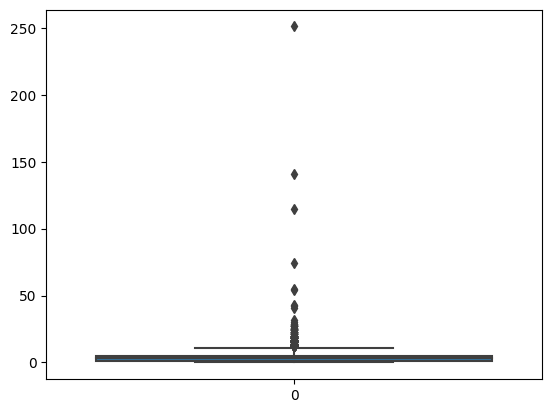

In [28]:
# print box plot of TotalVisits
sns.boxplot(df['TotalVisits'])

In [29]:
# function to handle outliers in columns using IQR method
def handle_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    df[col] = np.where(df[col]>upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col]<lower_limit, lower_limit, df[col])
    sns.boxplot(df[col])

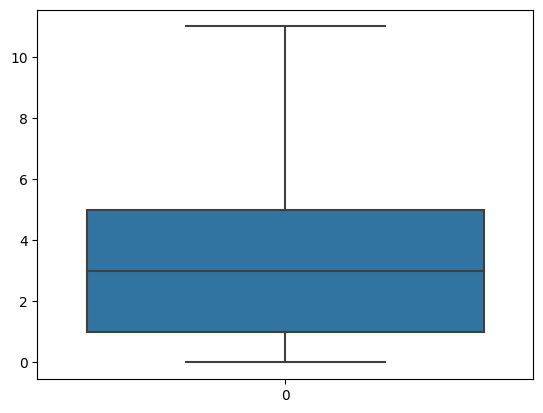

In [30]:
# handle outliers in TotalVisits
handle_outliers('TotalVisits')

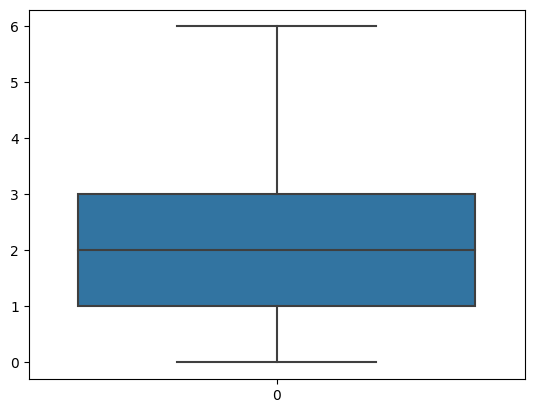

In [31]:
# handle outliers in Page Views Per Visit
handle_outliers('Page Views Per Visit')

In [32]:
# replace nan values in TotalVisits with median
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())

In [33]:
# replace nan values in Page Views Per Visit with median
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

In [34]:
# check percentage of null values in numerical columns
round(df[num_cols].isnull().sum()/len(df)*100,2).sort_values(ascending=False)

Lead Number                   0.00
Converted                     0.00
TotalVisits                   0.00
Total Time Spent on Website   0.00
Page Views Per Visit          0.00
dtype: float64

### Handle columns with all unique values

In [35]:
# print number of unique values in each column
df.nunique().sort_values(ascending=False)

Prospect ID                                 9240
Lead Number                                 9240
Total Time Spent on Website                 1731
Page Views Per Visit                          91
Lead Source                                   21
Specialization                                19
Last Activity                                 17
TotalVisits                                   12
What is your current occupation                6
Lead Origin                                    5
Converted                                      2
Do Not Call                                    2
Do Not Email                                   2
Search                                         2
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
A free copy of Mastering The Interview         2
Magazine            

In [36]:
# drop prospect id and lead number
df = df.drop(['Prospect ID', 'Lead Number'], axis=1)

### Handle columns with only one value

In [37]:
# get list of columns only 1 unique value
cols_to_drop = df.nunique()[df.nunique()==1].index
cols_to_drop

Index(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')

In [38]:
# drop columns with only 1 unique value
df = df.drop(cols_to_drop, axis=1)

In [39]:
# check null values in percentage again
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

Lead Origin                              0.00
Lead Source                              0.00
Through Recommendations                  0.00
Digital Advertisement                    0.00
Newspaper                                0.00
X Education Forums                       0.00
Newspaper Article                        0.00
Search                                   0.00
What is your current occupation          0.00
Specialization                           0.00
Last Activity                            0.00
Page Views Per Visit                     0.00
Total Time Spent on Website              0.00
TotalVisits                              0.00
Converted                                0.00
Do Not Call                              0.00
Do Not Email                             0.00
A free copy of Mastering The Interview   0.00
dtype: float64

In [40]:
# update list of categorical columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [41]:
# print count plot of categorical columns
cat_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
print(cat_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization', 'What is your current occupation', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']


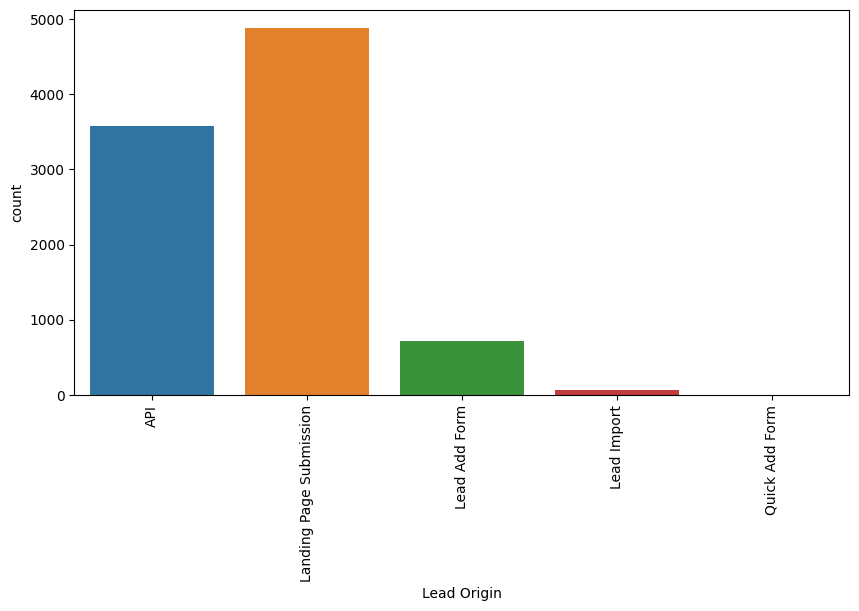

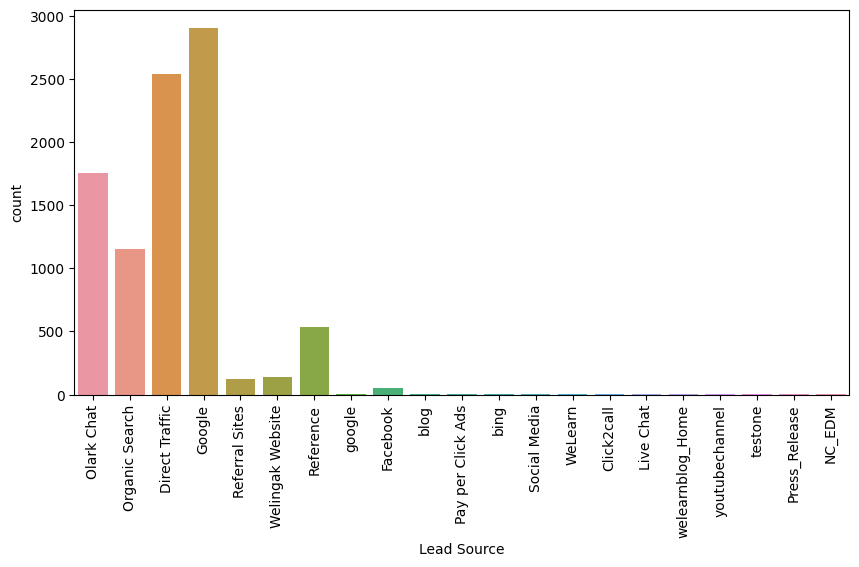

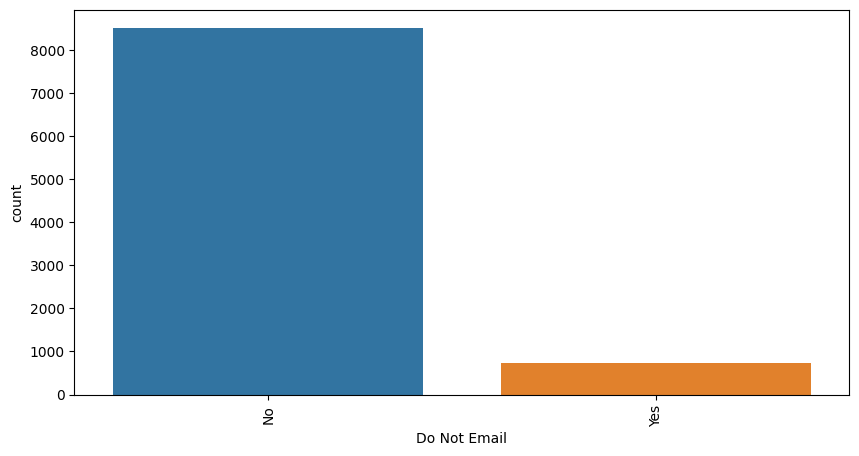

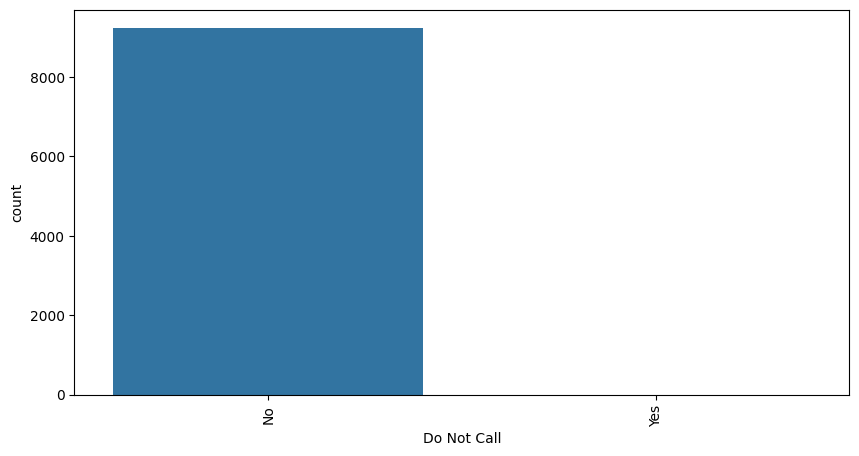

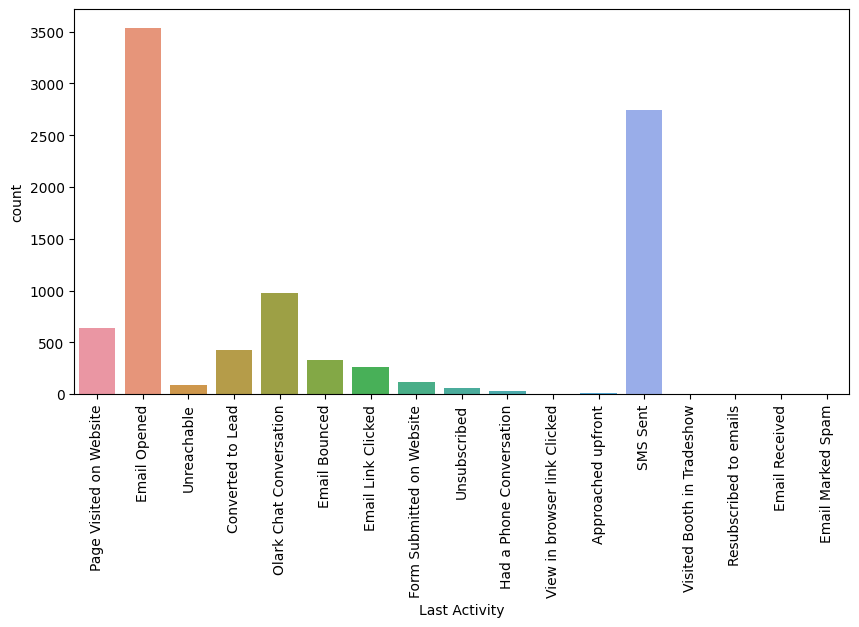

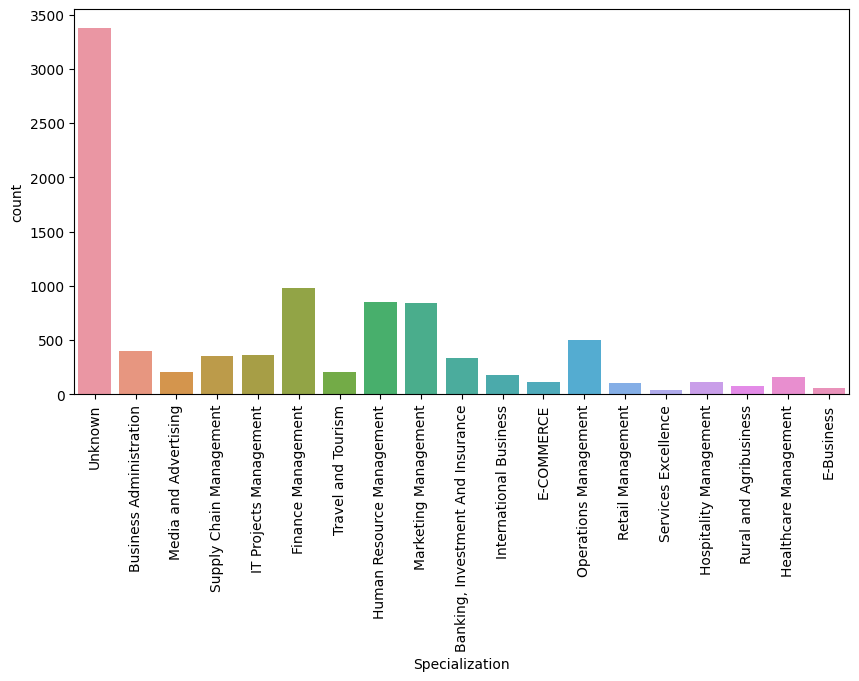

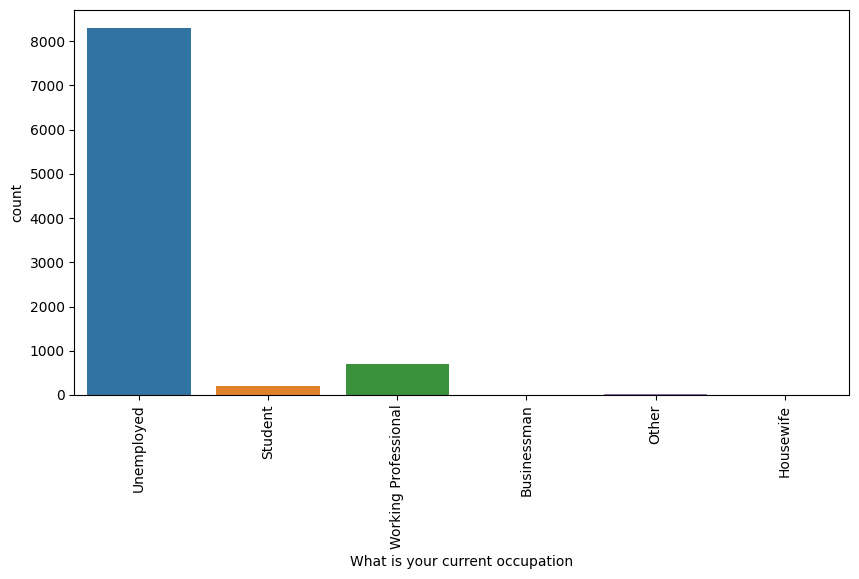

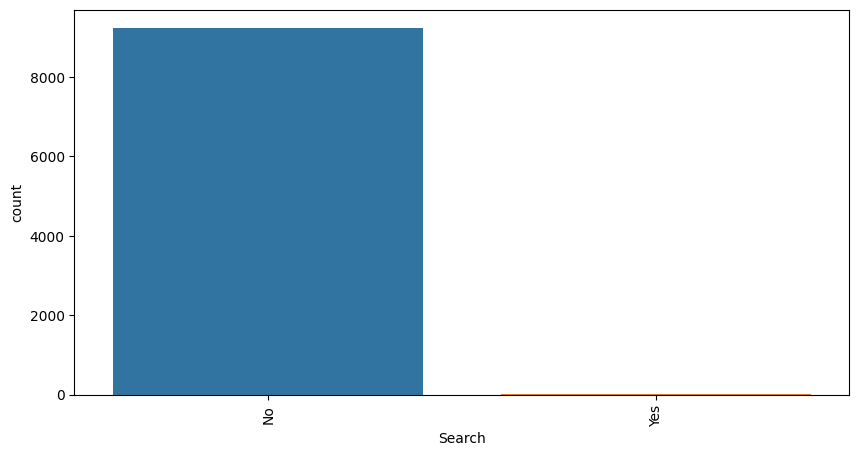

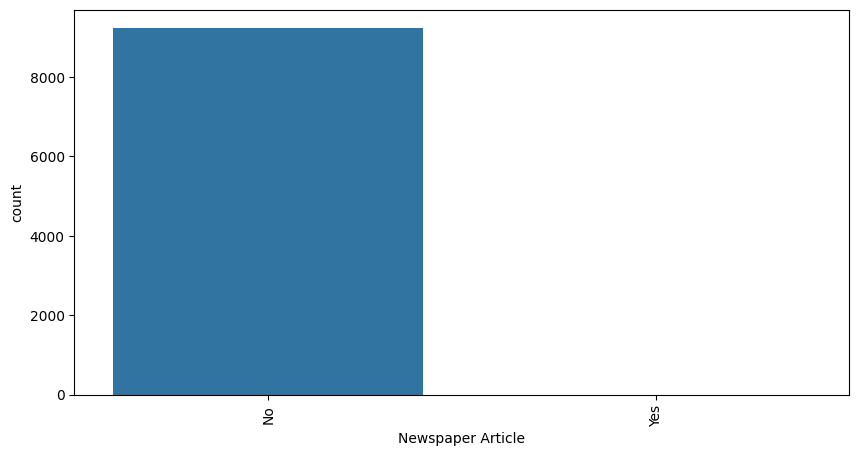

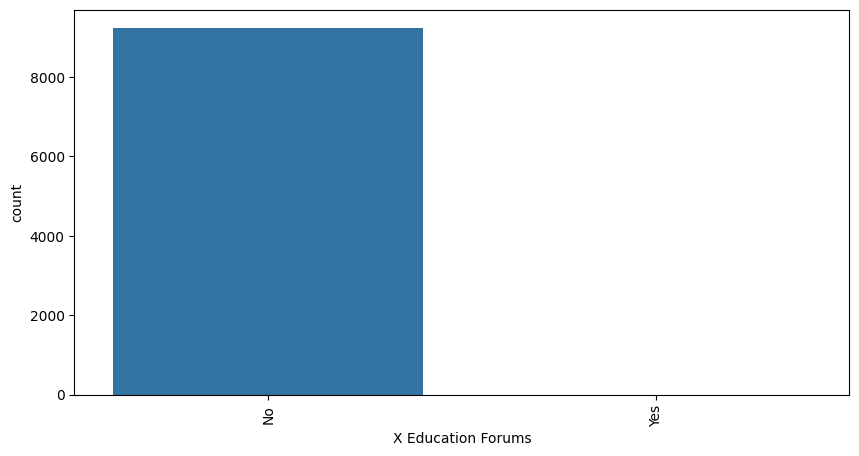

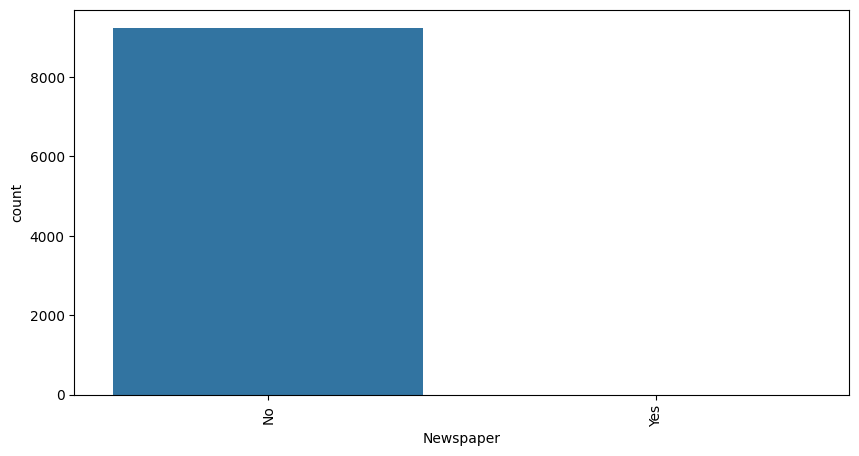

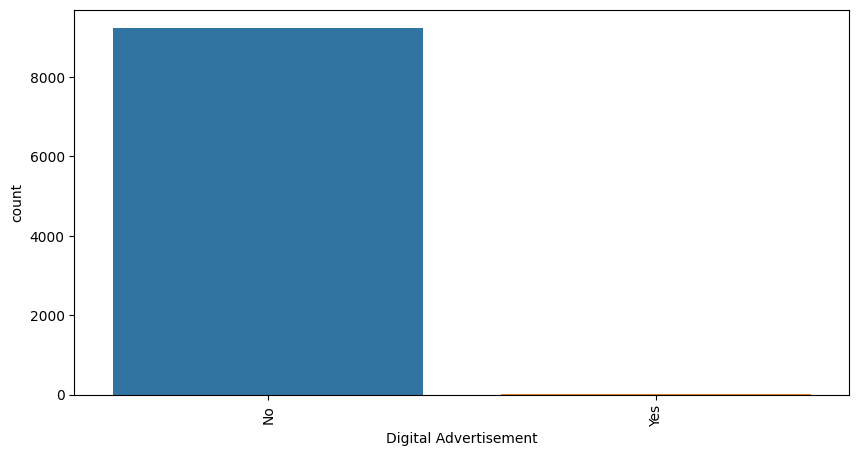

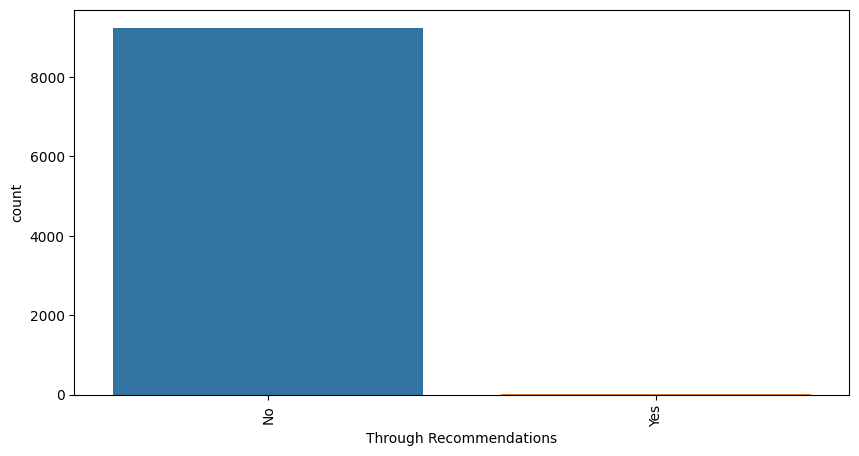

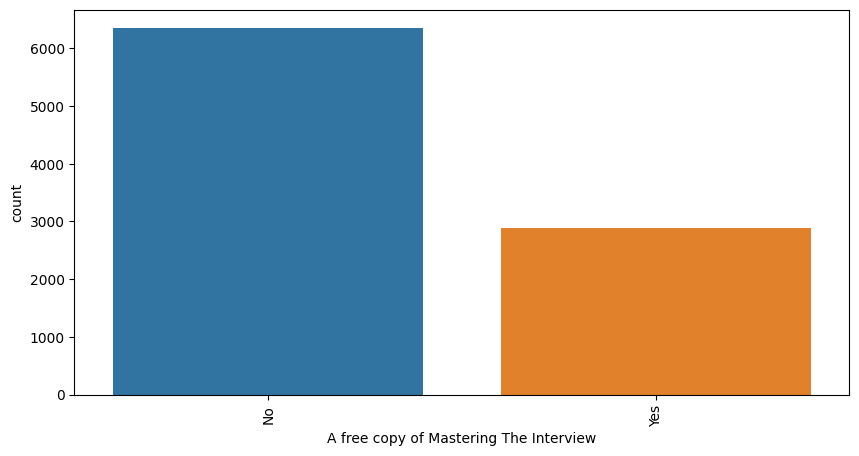

In [42]:
# loop over categorical columns and print count plot
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=df[col], data=df)
    plt.xticks(rotation=90)
    plt.show()

#### drop below columns as data is highly skewed
- 'Do Not Call',
- 'Search',
- 'Newspaper Article',
- 'X Education Forums',
- 'Newspaper',
- 'Digital Advertisement',
- 'Through Recommendations'.

In [43]:
# check shape of the dataset
df.shape

(9240, 18)

In [44]:
# drop columns 'Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'
df = df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'], axis=1)

In [45]:
# check shape of the dataset
df.shape

(9240, 11)

In [46]:
# get list of num_cols
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

### Group Values

In [47]:
# update cat_cols
cat_cols = df.select_dtypes(include='object').columns

# print value counts of categorical columns with dropna=False
for col in cat_cols:
    print('------------------------------------{}------------------------------------'.format(col))
    print(df[col].value_counts(dropna=False, normalize=True)*100)
    print()

------------------------------------Lead Origin------------------------------------
Landing Page Submission   52.88
API                       38.74
Lead Add Form              7.77
Lead Import                0.60
Quick Add Form             0.01
Name: Lead Origin, dtype: float64

------------------------------------Lead Source------------------------------------
Google              31.43
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
bing                 0.06
google               0.05
Click2call           0.04
Press_Release        0.02
Social Media         0.02
Live Chat            0.02
youtubechannel       0.01
testone              0.01
Pay per Click Ads    0.01
welearnblog_Home     0.01
WeLearn              0.01
blog                 0.01
NC_EDM               0.01
Name: Lead Source, dtype: float64

------------------------------------Do Not Email--------

In [48]:
# Handle Lead Source column
 # replace 'google' with 'Google'
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')

In [49]:
# groupd values in Lead Source column
df['Lead Source'] = df['Lead Source'].replace(['Facebook','bing','Click2call','Press_Release',
                                                           'Social Media','Live Chat','youtubechannel',
                                                           'testone','Pay per Click Ads','welearnblog_Home',
                                                           'WeLearn','blog','NC_EDM'],'Others')

In [50]:
# print value counts of Lead Source column
df['Lead Source'].value_counts(dropna=False, normalize=True)*100

Google             31.48
Direct Traffic     27.52
Olark Chat         18.99
Organic Search     12.49
Reference           5.78
Welingak Website    1.54
Referral Sites      1.35
Others              0.84
Name: Lead Source, dtype: float64

In [51]:
# group values in Last Activity column
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation',
                                                               'Approached upfront',
                                                               'View in browser link Clicked',
                                                               'Email Marked Spam',
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [52]:
# check value counts of Last Activity column
df['Last Activity'].value_counts(dropna=False, normalize=True)*100

Email Opened                38.31
SMS Sent                    29.71
Olark Chat Conversation     10.53
Page Visited on Website      6.93
Converted to Lead            4.63
Email Bounced                3.53
Email Link Clicked           2.89
Others                       2.22
Form Submitted on Website    1.26
Name: Last Activity, dtype: float64

In [53]:
# replace Yes/No in email and A free copy of Mastering The Interview with 1 and 0
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].replace({'Yes':1, 'No':0})
df['Do Not Email'] = df['Do Not Email'].replace({'Yes':1, 'No':0})

### Perform EDA here start

In [54]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [55]:
# rename columns
df.rename(columns={'What is your current occupation':'Occupation'}, inplace=True)
df.rename(columns={'A free copy of Mastering The Interview':'Free Copy'}, inplace=True)

### Univariate Analysis

In [56]:
# find categorical columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'Occupation'],
      dtype='object')

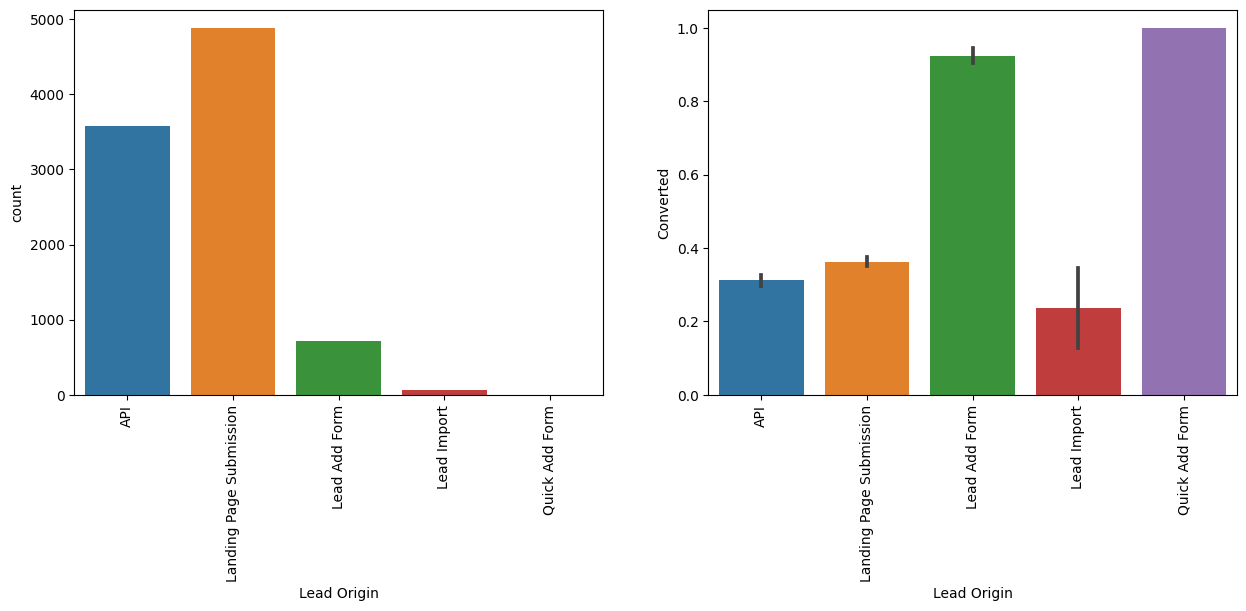

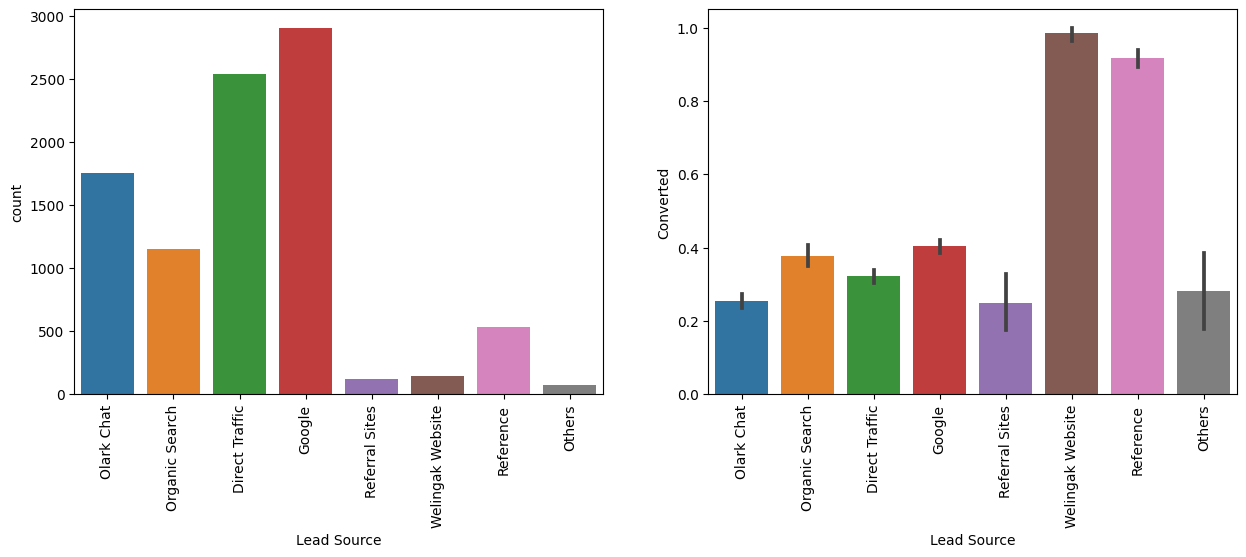

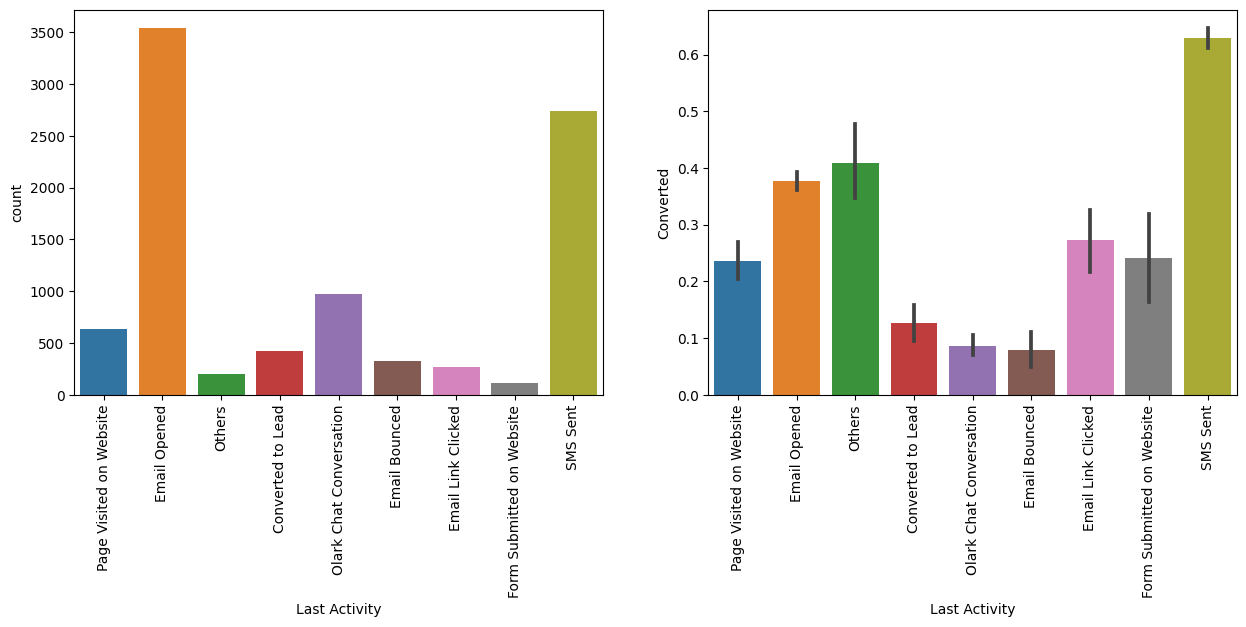

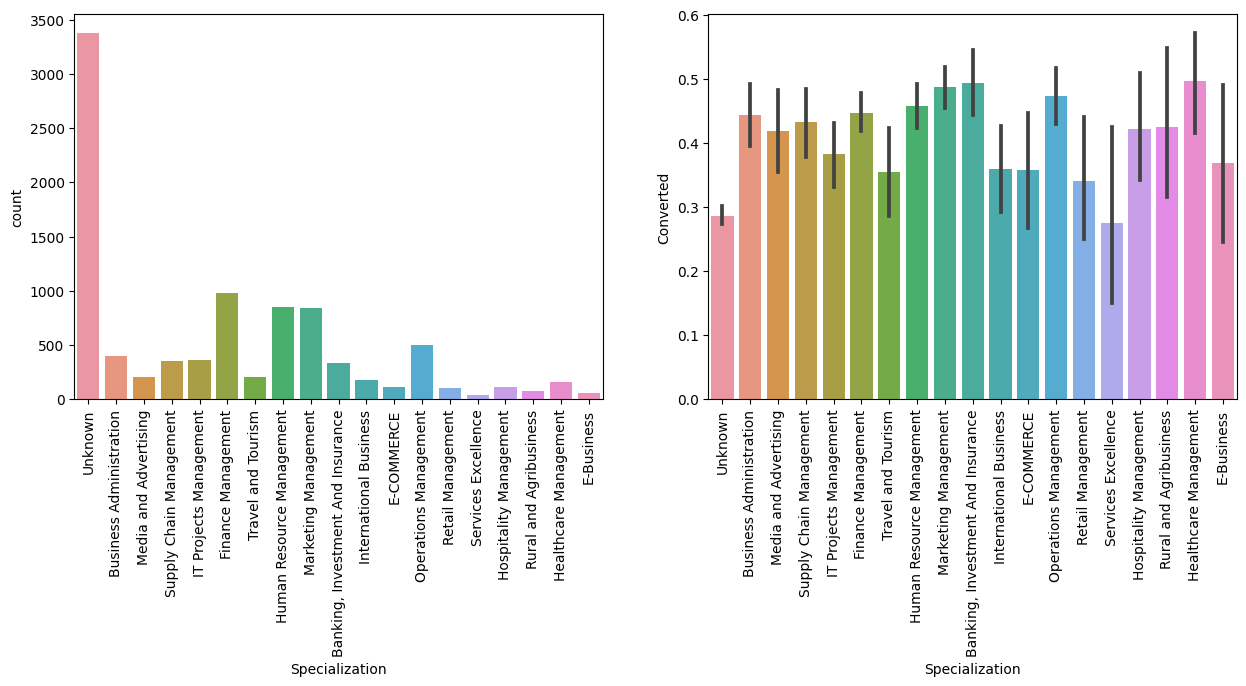

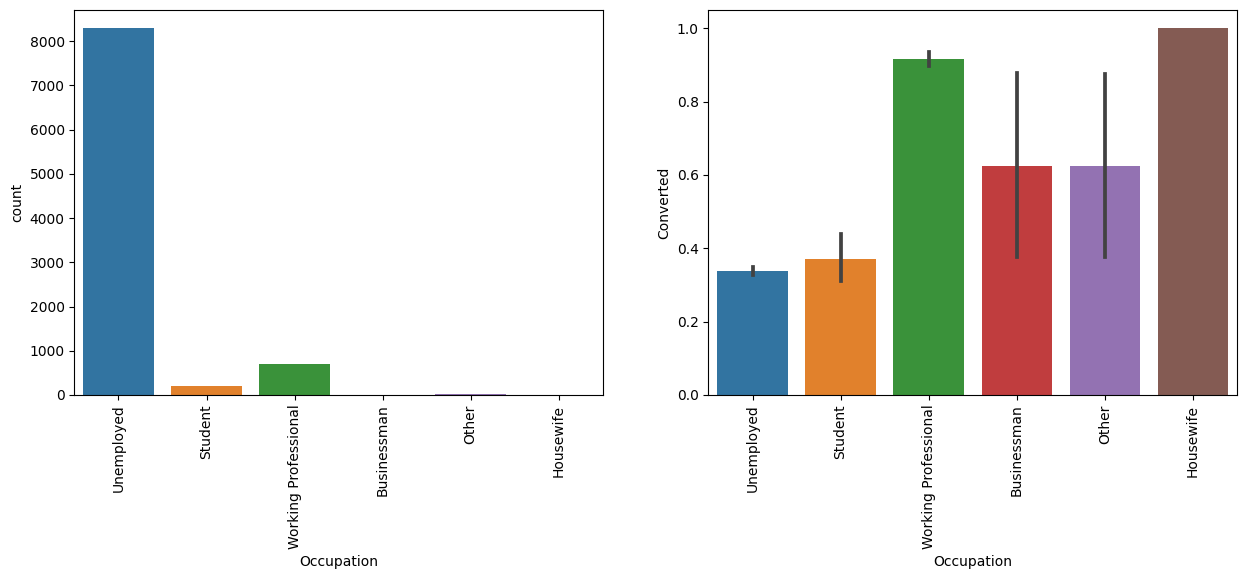

In [57]:
# print count plot and bar plot of categorical columns side by side
for col in cat_cols:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.countplot(x=df[col], data=df)
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.barplot(x=df[col], y=df['Converted'], data=df)
    plt.xticks(rotation=90)
    plt.show()

### Observations
- For column Lead Origin Lead Page Submission and API majorly contribute to conversion
- For Lead Source Direct Traffic and Google contribute to conversion
- For Last Activity SMS Sent and Olark Chat Conversation contribute to conversion
- Majority of people are unemployed

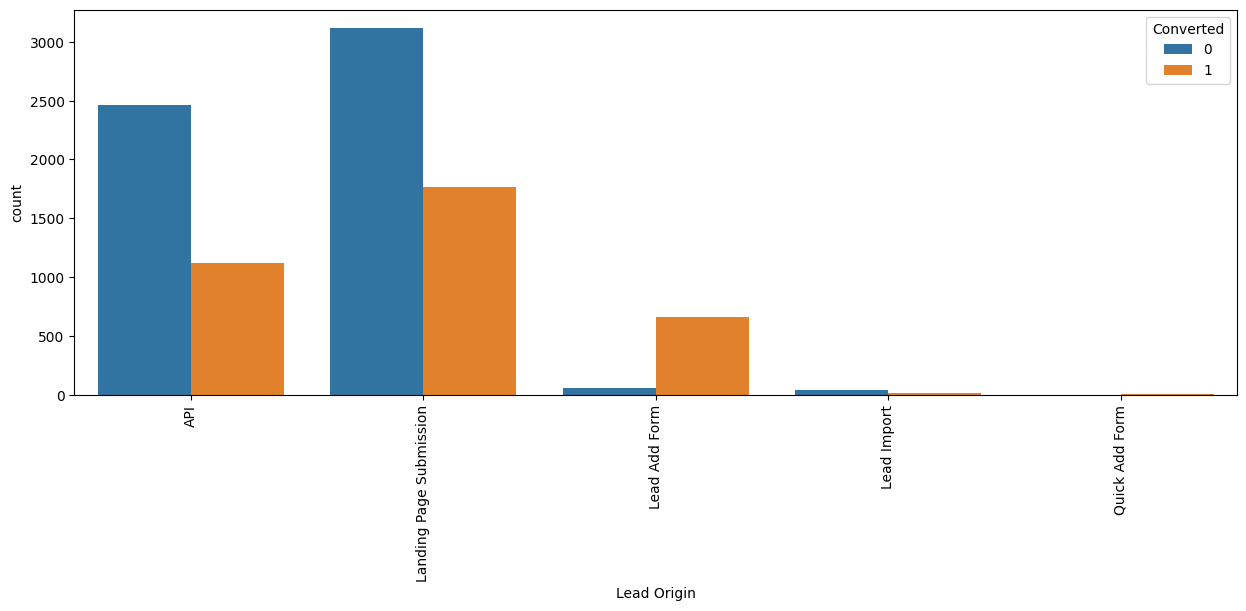

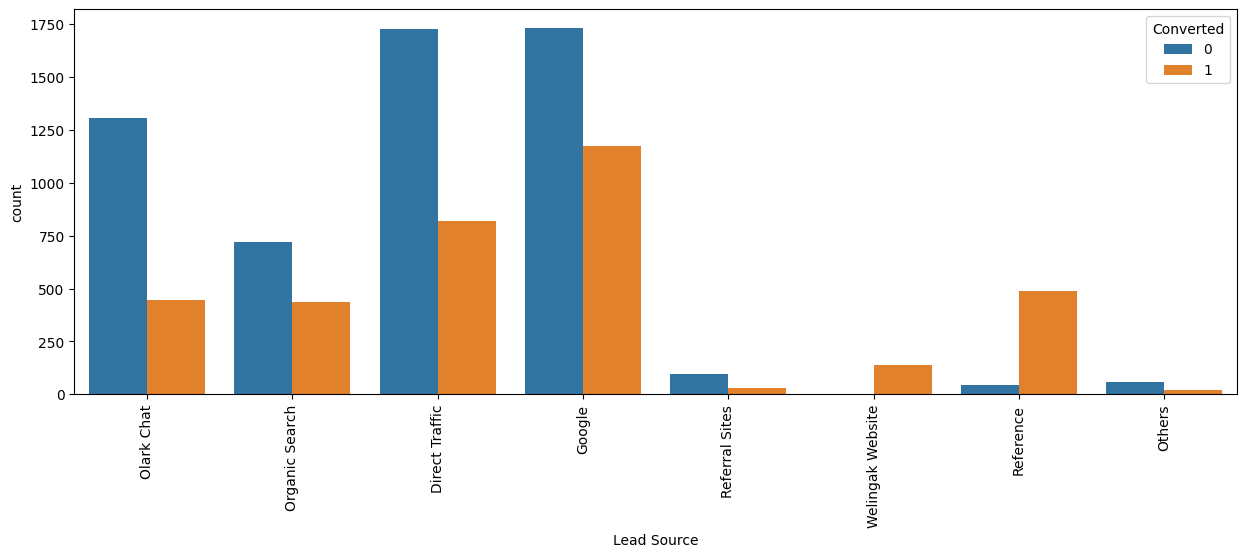

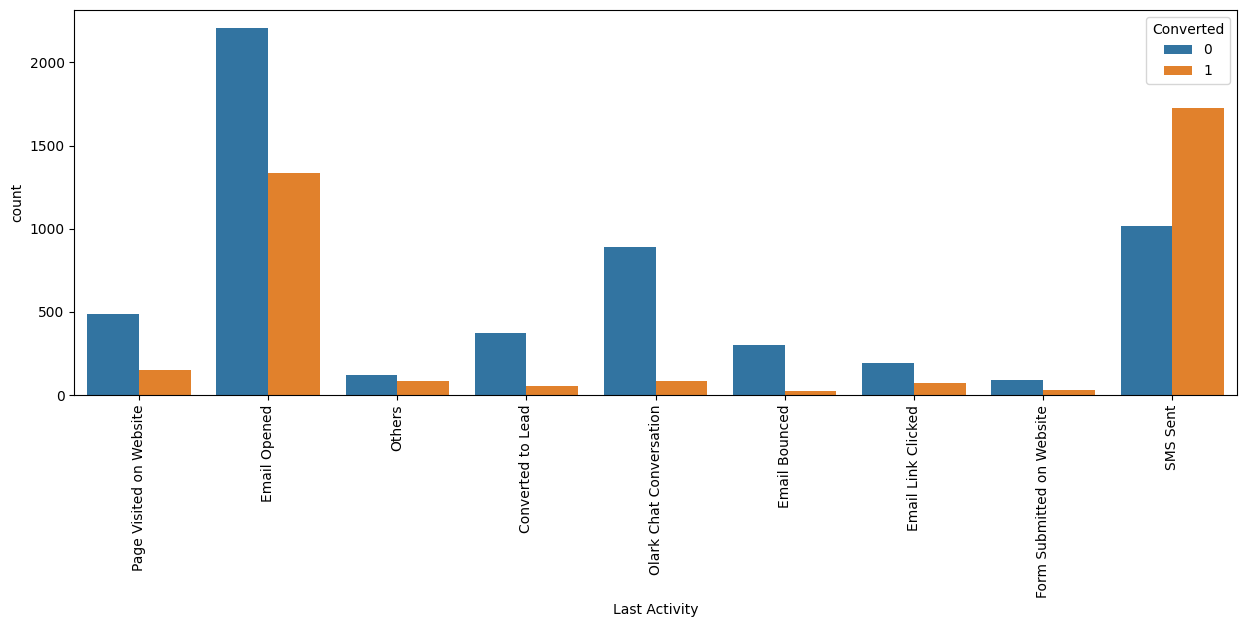

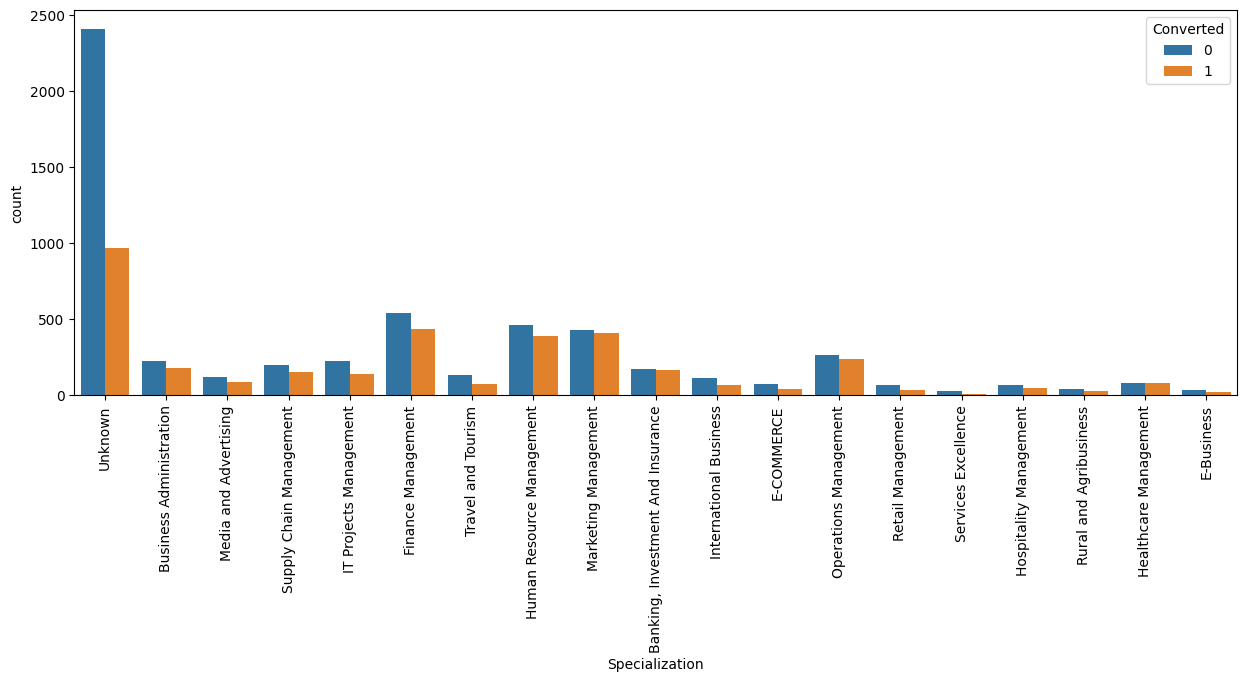

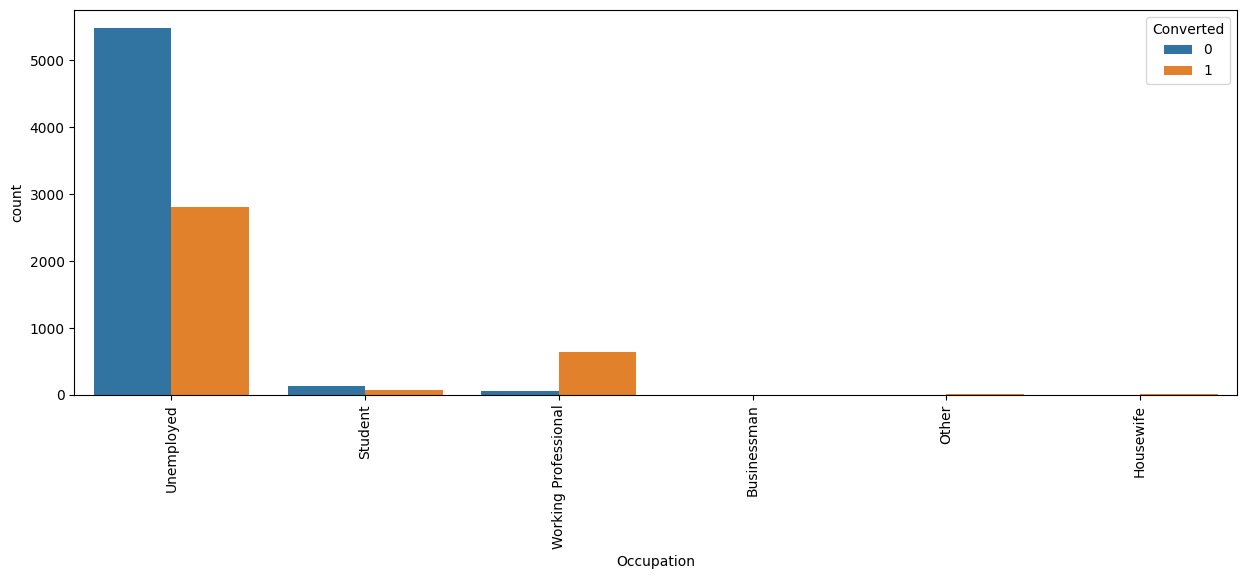

In [58]:
### Bivariate Analysis
# print count plot of categorical columns with hue=Converted
for col in cat_cols:
    plt.figure(figsize=(15,5))
    sns.countplot(x=df[col], hue=df['Converted'], data=df)
    plt.xticks(rotation=90)
    plt.show()

### Observation
- Lead Origin: API and Landing Page Submission have more number of leads and also more number of converted leads
- Lead Source: Google and Direct Traffic have more number of leads and also more number of converted leads
- Last Activity: Email Opened and SMS Sent have more number of leads and also more number of converted leads
- Specialization: Finance Management, Marketing Management and Human Resource Management have more number of leads and also more number of converted leads
- Occupation: Unemployed have more number of leads and also more number of converted leads

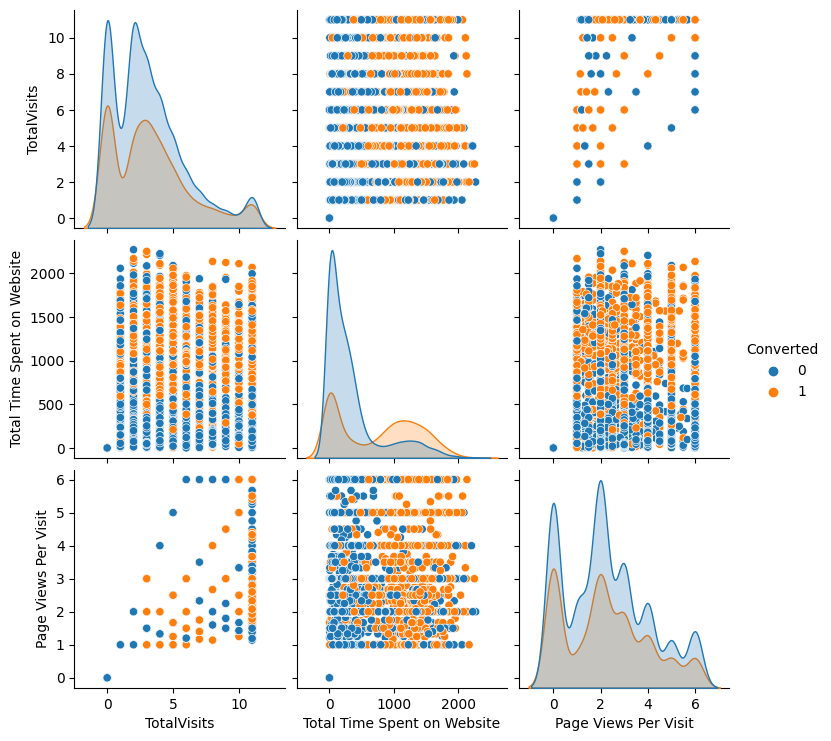

In [59]:
# print pairplot of numerical columns with hue=Converted
sns.pairplot(df, vars=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], hue='Converted')
plt.show()

In [60]:
# print list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Free Copy'],
      dtype='object')

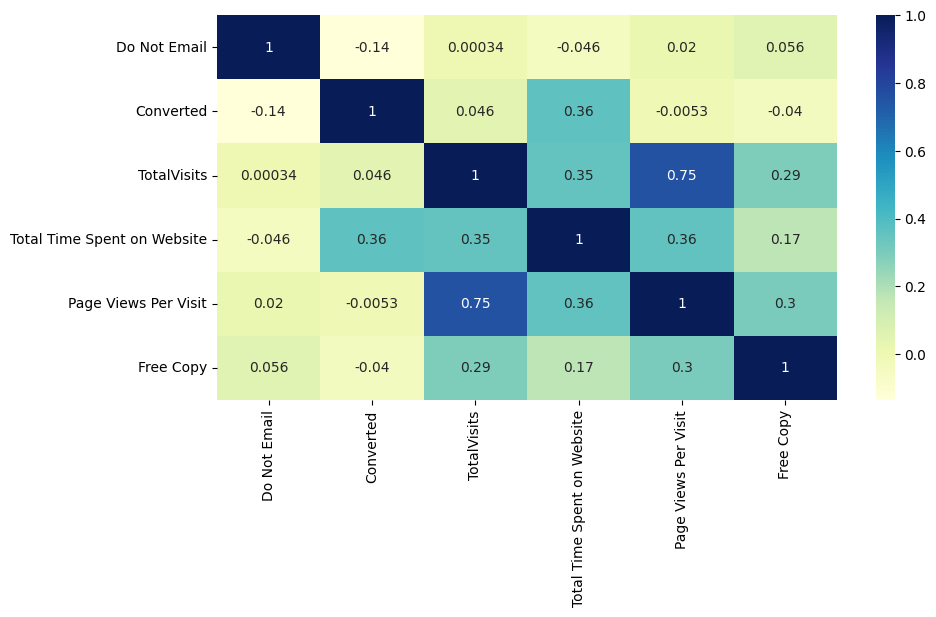

In [61]:
# print heatmap of numerical columns
plt.figure(figsize=(10,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='YlGnBu')
plt.show()

### Perform EDA here end

### Data Preparation

In [62]:
# find list of categorical columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'Occupation'],
      dtype='object')

In [63]:
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity','Occupation']], drop_first=True)
dummy2 = pd.get_dummies(df['Specialization'], prefix = "Specialization").drop("Specialization_Unknown", axis = 1)

In [64]:
df = pd.concat([df, dummy1,dummy2], axis=1)

In [65]:
# get dummies for categorical columns
# dummy = pd.get_dummies(df[cat_cols], drop_first=True)

In [66]:
# add dummy columns to df
# df = pd.concat([df, dummy], axis=1)

In [67]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0.00,0,0.00,Page Visited on Website,Unknown,Unemployed,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.00,674,2.50,Email Opened,Unknown,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.00,1532,2.00,Email Opened,Business Administration,Student,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.00,305,1.00,Others,Media and Advertising,Unemployed,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.00,1428,1.00,Converted to Lead,Unknown,Unemployed,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
# since we have created dummy variables for categorical columns, we can drop them
df = df.drop(cat_cols, axis=1)

In [69]:
# check shape of the dataset
df.shape

(9240, 48)

### Test-Train Split

In [70]:
# split data into X and y
X = df.drop('Converted', axis=1)
y = df['Converted']

In [71]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [72]:
# print shape of train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6468, 47)
(2772, 47)
(6468,)
(2772,)


### Feature Scaling

In [73]:
# find list of numerical columns
num_cols = X_train.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Free Copy'],
      dtype='object')

In [74]:
# scale numerical columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [75]:
# check head of X_train
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1871,-0.29,-1.12,-0.89,-1.27,-0.67,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6795,-0.29,0.28,0.01,-0.52,1.49,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3516,-0.29,0.62,-0.69,0.14,-0.67,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8105,-0.29,0.62,1.37,1.55,-0.67,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3934,-0.29,-1.12,-0.89,-1.27,-0.67,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


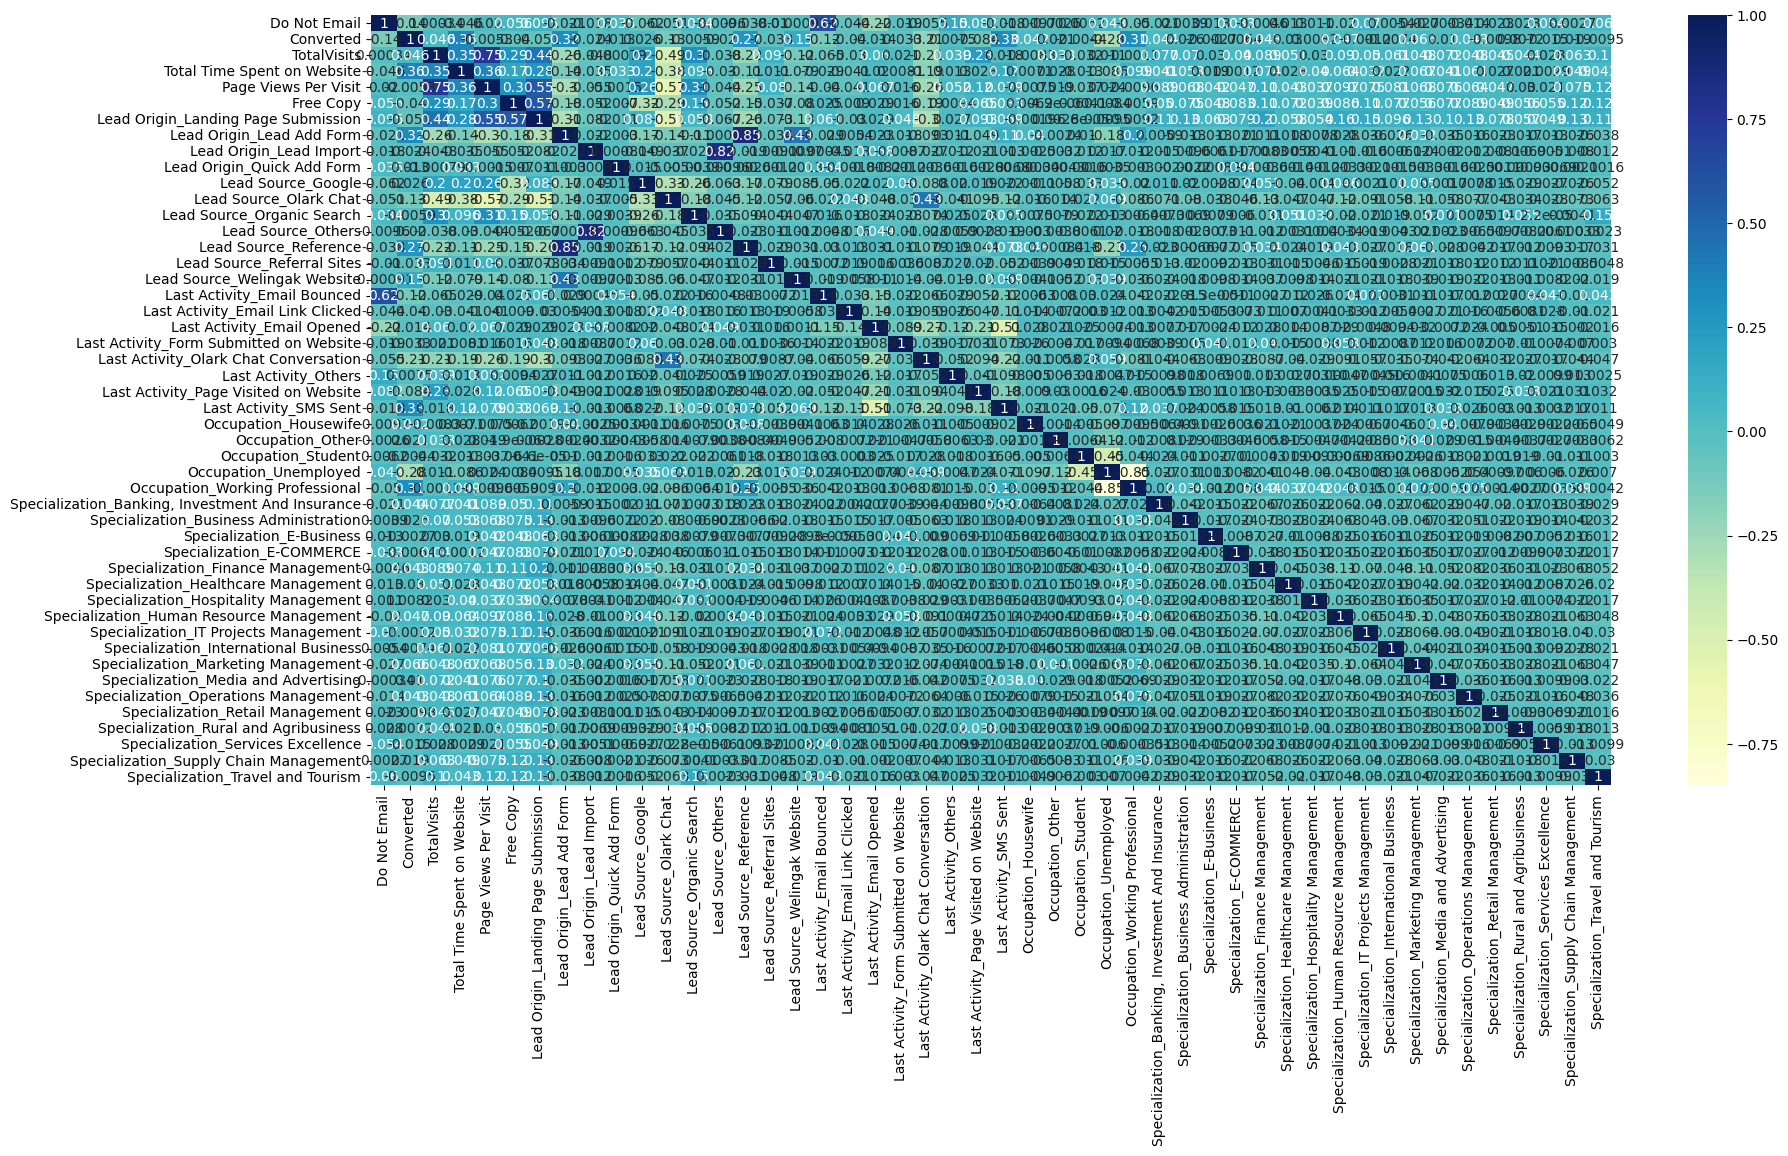

In [76]:
### check correlation of columns using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [77]:
### RFE Model Building
# create logistic regression model
logreg = LogisticRegression()

# create RFE model with 15 features
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [78]:
# check output of RFE model
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 23),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Free Copy', False, 28),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('Lead Origin_Quick Add Form', False, 27),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 29),
 ('Lead Source_Others', False, 25),
 ('Lead Source_Reference', False, 16),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 30),
 ('Last Activity_Email Link Clicked', False, 20),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 31),
 ('Last Activity_Olark Chat Conversation', False, 14),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 26),
 ('Last Activity_SMS Sent', True, 1

In [79]:
# create a dataframe with columns and their RFE ranking of top 15 features sorted by ranking
rfe_df = pd.DataFrame({'Columns':X_train.columns, 'Included':rfe.support_, 'Ranking':rfe.ranking_})
rfe_df = rfe_df.sort_values(by='Ranking')
rfe_df

,Columns,Included,Ranking
23,Last Activity_SMS Sent,True,1
18,Last Activity_Email Opened,True,1
24,Occupation_Housewife,True,1
28,Occupation_Working Professional,True,1
15,Lead Source_Welingak Website,True,1
29,"Specialization_Banking, Investment And Insurance",True,1
32,Specialization_E-COMMERCE,True,1
33,Specialization_Finance Management,True,1
10,Lead Source_Olark Chat,True,1
6,Lead Origin_Lead Add Form,True,1


In [80]:
# print list of columns selected by RFE model
rfe_cols = rfe_df[rfe_df['Included']==True]['Columns'].values
rfe_cols

array(['Last Activity_SMS Sent', 'Last Activity_Email Opened',
       'Occupation_Housewife', 'Occupation_Working Professional',
       'Lead Source_Welingak Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Lead Source_Olark Chat', 'Lead Origin_Lead Add Form',
       'Lead Origin_Landing Page Submission',
       'Total Time Spent on Website',
       'Specialization_Rural and Agribusiness',
       'Specialization_IT Projects Management', 'Last Activity_Others'],
      dtype=object)

In [81]:
# print list of columns not selected by RFE model
rfe_df[rfe_df['Included']==False]['Columns'].values

array(['Specialization_Media and Advertising',
       'Specialization_Healthcare Management',
       'Specialization_Marketing Management',
       'Specialization_Human Resource Management',
       'Specialization_Operations Management',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'Specialization_Business Administration',
       'Specialization_E-Business', 'Occupation_Unemployed',
       'Occupation_Other', 'Occupation_Student',
       'Last Activity_Olark Chat Conversation',
       'Specialization_Services Excellence', 'Lead Source_Reference',
       'Specialization_International Business',
       'Specialization_Retail Management', 'Lead Origin_Lead Import',
       'Last Activity_Email Link Clicked', 'TotalVisits',
       'Page Views Per Visit', 'Do Not Email', 'Lead Source_Google',
       'Lead Source_Others', 'Last Activity_Page Visited on Website',
       'Lead Origin_Quick Add Form', 'Free Copy',
       'Lead Source_Organic

In [82]:
# method to calculate VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

### Model 1

In [83]:
# columns selected by RFE model
rfe_col = X_train.columns[rfe.support_]

# create X_train_rfe dataframe with columns selected by RFE model
X_train_rfe = X_train[rfe_col]

# add constant to X_train_rfe
X_train_sm1 = sm.add_constant(X_train_rfe)

# create first fitted model
logm1 = sm.GLM(y_train, X_train_sm1, family=sm.families.Binomial()).fit()

# print summary
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2761.9
Date:                Tue, 18 Jul 2023   Deviance:                       5523.8
Time:                        09:24:19   Pearson chi2:                 7.53e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3783
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [84]:
calc_vif(X_train_rfe)

,Features,VIF
1,Lead Origin_Landing Page Submission,2.34
5,Last Activity_Email Opened,1.76
7,Last Activity_SMS Sent,1.74
2,Lead Origin_Lead Add Form,1.60
3,Lead Source_Olark Chat,1.37
0,Total Time Spent on Website,1.24
4,Lead Source_Welingak Website,1.24
12,Specialization_Finance Management,1.21
9,Occupation_Working Professional,1.18
13,Specialization_IT Projects Management,1.08


### Model 2

In [85]:
# lets drop column Occupation_Housewife as it has high p-value
rfe_col = rfe_col.drop('Occupation_Housewife', 1)

In [86]:
# create X_train_rfe dataframe with columns selected by RFE model
X_train_rfe = X_train[rfe_col]

# add constant to X_train_rfe
X_train_sm2 = sm.add_constant(X_train_rfe)

# create second fitted model
logm2 = sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial()).fit()

# print summary
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2770.3
Date:                Tue, 18 Jul 2023   Deviance:                       5540.6
Time:                        09:24:19   Pearson chi2:                 7.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3767
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

### Model 3

In [87]:
rfe_col = rfe_col.drop('Specialization_E-COMMERCE', 1)

In [89]:
# create X_train_rfe dataframe with columns selected by RFE model
X_train_rfe = X_train[rfe_col]

# add constant to X_train_rfe
X_train_sm3 = sm.add_constant(X_train_rfe)

# create third fitted model
logm3 = sm.GLM(y_train, X_train_sm3, family=sm.families.Binomial()).fit()

# print summary
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2771.3
Date:                Tue, 18 Jul 2023   Deviance:                       5542.6
Time:                        09:24:19   Pearson chi2:                 7.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3765
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [90]:
# Model 3 has P value for all columns less than 0.05. Lets check VIF for this model
calc_vif(X_train_rfe)

,Features,VIF
1,Lead Origin_Landing Page Submission,2.30
5,Last Activity_Email Opened,1.76
7,Last Activity_SMS Sent,1.74
2,Lead Origin_Lead Add Form,1.59
3,Lead Source_Olark Chat,1.37
0,Total Time Spent on Website,1.24
4,Lead Source_Welingak Website,1.24
10,Specialization_Finance Management,1.20
8,Occupation_Working Professional,1.18
11,Specialization_IT Projects Management,1.08


## Model Evaluation

### Confusion Matrix

In [91]:
# predict values using sixth fitted model
y_train_pred = logm3.predict(X_train_sm3).values.reshape(-1)

y_train_pred[:10]

array([0.23363942, 0.18450779, 0.27399417, 0.74192147, 0.23363942,
       0.98875035, 0.19201288, 0.99352839, 0.17011801, 0.89075878])

In [92]:
# create dataframe with actual converted flag and predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,0,0.23,1871
1,0,0.18,6795
2,0,0.27,3516
3,0,0.74,8105
4,0,0.23,3934


In [93]:
# we can use 0.5 as cutoff probability to convert probability to 0 or 1
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted
0,0,0.23,1871,0
1,0,0.18,6795,0
2,0,0.27,3516,0
3,0,0.74,8105,1
4,0,0.23,3934,0


### check the confusion matrix

In [94]:
# confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
confusion

array([[3582,  420],
       [ 867, 1599]])

In [95]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3582       |   420
# converted           867        |   1599


# Above is the confusion matrix when we use threshold of probability as 0.5

In [96]:
### Checking accuracy of model
# overall accuracy

print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted']))

0.8010204081632653


In [97]:
# lets check sensitivity and specificity
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
# specificity
TN / float(TN+FP)

0.8950524737631185

In [99]:
# sensitivity
TP / float(TP+FN)

0.648418491484185

In [100]:
# calculate false postive rate - predicting converted when customer has not converted
FP/ float(TN+FP)

0.10494752623688156

In [101]:
# negative predictive value
TN / float(TN+FN)

0.8051247471341875

In [102]:
# positive predictive value
TP / float(TP+FP)

0.7919762258543833

### ROC Curve

In [103]:
# create function to plot ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

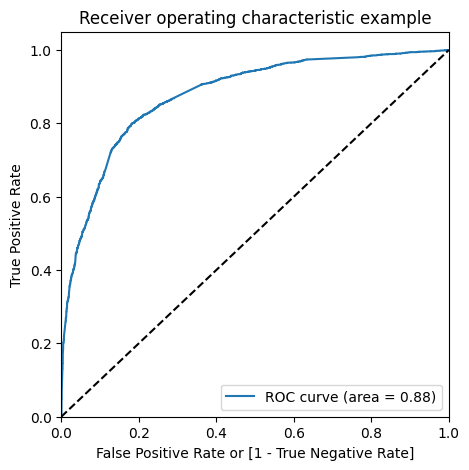

In [105]:
# draw ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

##### area under curve is 0.87 which is good for a predictive model

### finding optimal cutoff point

In [106]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.23,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.18,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.27,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.74,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.23,3934,0,1,1,1,0,0,0,0,0,0,0


In [107]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.61   0.97   0.39
0.20  0.20      0.72   0.92   0.59
0.30  0.30      0.80   0.82   0.78
0.40  0.40      0.81   0.76   0.85
0.50  0.50      0.80   0.65   0.90
0.60  0.60      0.79   0.58   0.92
0.70  0.70      0.78   0.50   0.94
0.80  0.80      0.75   0.39   0.97
0.90  0.90      0.71   0.26   0.99


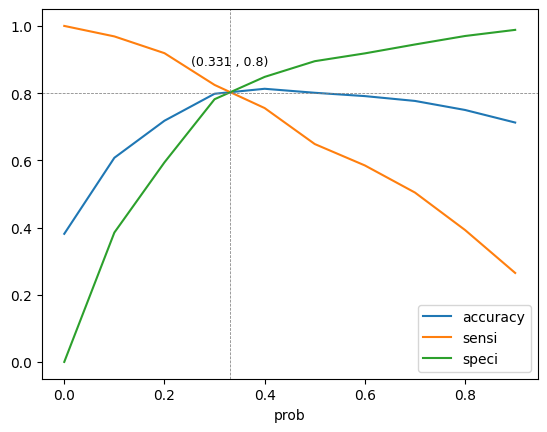

In [108]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

In [109]:
# .331 is the optimal cut off probability
# map the predicted values to 1 and 0 based on the cut off probability

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.331 else 0)

# check head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.23,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.18,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.27,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.74,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.23,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [110]:
# check accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8079777365491652

In [111]:
# check confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3249,  753],
       [ 489, 1977]])

In [112]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [113]:
# lets check accuracy, specificity and sensitivity
print("Accuracy: ", round((TP+TN)/float(TP+TN+FP+FN),2))
print("Sensitivity: ", round(TP/float(TP+FN),2))
print("Specificity: ", round(TN/float(TN+FP),2))


Accuracy:  0.81
Sensitivity:  0.8
Specificity:  0.81


In [114]:
# calulate false positive rate, positive predictive value and negative predictive value

print("False Positive Rate: ", round(FP/float(TN+FP),2))
print("Positive Predictive Value: ", round(TP/float(TP+FP),2))
print("Negative Predictive Value: ", round(TN/float(TN+ FN),2))

False Positive Rate:  0.19
Positive Predictive Value:  0.72
Negative Predictive Value:  0.87


### Precision and Recall

In [115]:
# plot curve for precision and recall
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

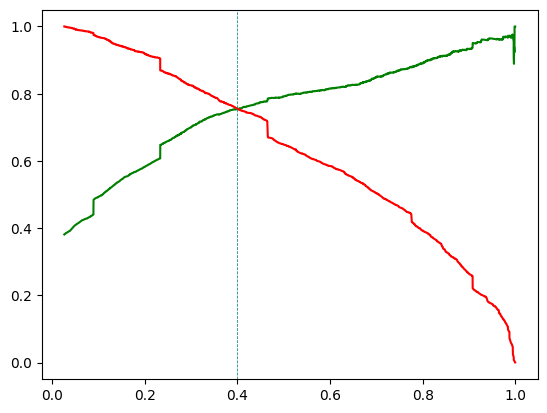

In [116]:
# plot precision and recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.40, color='teal',linewidth = 0.55, linestyle='--')
plt.show()

In [122]:
X_train_sm3.columns[1:]

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Finance Management',
       'Specialization_IT Projects Management',
       'Specialization_Rural and Agribusiness'],
      dtype='object')

# Prediction on Test Data

In [121]:
# Scaling of Test data
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [124]:
X_test = X_test[X_train_sm3.columns[1:]]

In [126]:
X_test = sm.add_constant(X_test)
y_test_pred = logm3.predict(X_test)
df_test = pd.DataFrame(list(zip(y_test,y_test_pred)), columns = ["Actual","Probability"])
df_test["final_thresh"] = df_test["Probability"].apply(lambda x: 1 if x > 0.331 else 0)


In [129]:
df_test.head()

,Actual,Probability,final_thresh
0,1,0.72,1
1,1,0.91,1
2,1,0.75,1
3,0,0.09,0
4,1,0.77,1


In [130]:
# check accuracy
metrics.accuracy_score(df_test["Actual"], df_test["final_thresh"])

0.7997835497835498

In [132]:
# check confusion matrix
confusion3 = metrics.confusion_matrix(df_test["Actual"], df_test["final_thresh"])
confusion3

array([[1345,  332],
       [ 223,  872]])

In [133]:
# lets check sensitivity and specificity
TP = confusion3[1,1] # true positive
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [135]:
# lets check accuracy, specificity and sensitivity
print("Accuracy: ", round((TP+TN)/float(TP+TN+FP+FN),2))
print("Sensitivity: ", round(TP/float(TP+FN),2))
print("Specificity: ", round(TN/float(TN+FP),2))

Accuracy:  0.8
Sensitivity:  0.8
Specificity:  0.8


In [136]:
# calulate false positive rate, positive predictive value and negative predictive value

print("False Positive Rate: ", round(FP/float(TN+FP),2))
print("Positive Predictive Value: ", round(TP/float(TP+FP),2))
print("Negative Predictive Value: ", round(TN/float(TN+ FN),2))

False Positive Rate:  0.2
Positive Predictive Value:  0.72
Negative Predictive Value:  0.86


# Conclusion
Analysis on the data is carried by carrying both automatic and manual approach.
Recursive Feature Elimination is used for automated approach where we initially used 15 features.
Further selection is done manually by looking at multicollinearity and statistical significance of features and overall fit of the model. The 12 most significant features are 'Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Finance Management',
       'Specialization_IT Projects Management',
       'Specialization_Rural and Agribusiness'


Training and Testing data is divided into 70 :30 split.
 Automated(RFE) and manual approach (based on p-value and VIF Score) is used and we got 12 features that are significant.


Some of the most contributing Features for the model are:
Lead Origin_Lead Add Form, Occupation Working Professional, Last Activity
SMS Sent, Lead Source_ Welingak Website.

Note :
1. Data is cleaned wherever necessary
2. using get_dummies we have converted categorical data to numerical
3. Select is consider are null values hence dropped wherever necessary.
4. EDA is carried out
5. RFE is carried to deduce the features to 15
6. Mannual approach is used to deduce the features to 12
7. Functions are created wherever there are repetative work.
8. Various metrices are calculated like
   a. Confusion matrix
   b. Accuracy Score
   c. Sensitivity
   d. Specificity
   and other metrics are calculated
9. Graph is plotted for accuracy, sensitivity, and specificity to get the point of merge where the threshold value results a balanced output of various scores.
10. precision_recall_curve is used to confirm the same.
11. Accuracy, Sensitivity, Specificity and Precision is close to 80% for training data set by only using 12 variables.
12. Same Model is used for testing data and results were quiet reliable as per mentioned by CEO to be around 80%.
13. Out of 12 Features only Lead Origin_Landing Page Submission is impacting model negatively.
14. Rest all the Features impacts negatively to the model.
15. Final Threshold value is 0.331, where we get balanced output.
16. Accuracy, sensitivity and specificity for both test and train data is around 0.8 hence we can say that the perfoemance of model is good and is meeting the criteria of the CEO i.e around 80%

